#  Project to recognise handwritten Characters using CNN

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import csv
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [5]:
img_size = 75
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            Rimg = cv2.resize(img, (img_size, img_size))
            images.append([Rimg,filename])
    return images

In [6]:
labels = pd.read_csv('english.csv', index_col = None)

i = 0
while i < 3410:
    labels["Image"][i] = labels["Image"][i][4:]
    i += 1
    

label_dict = labels.set_index("Image").T.to_dict()  ##contains {'image name': 'label'} as key:value pair

In [7]:
input_imgs = load_images("Img")      ##images are loaded as numpy array using this function call 

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

NameError: name 'X_train' is not defined

In [9]:
data = []
for img  in input_imgs:
    data.append([img[0], label_dict[img[1]]["label"]])
    ##keeping   [IMAGE ARRAY, IMAGE LABEL] as list in data 

### Forming a class dict to label all classes to a integer

In [10]:
class_dict = {}
inID = 10
for integer in range(0,10):
    class_dict[str(integer)] = integer

for char in range(65,65+26):
    class_dict[chr(char)] = inID
    inID += 1

for char in range(97,97+26):
    class_dict[chr(char)] = inID
    inID += 1
    
# class_dict  


In [11]:
X_train = []
Y_train = []

for img_array, img_label in data:
    X_train.append(img_array)
    Y_train.append(img_label)
    
X_train = np.array(X_train)  ##contains all the images as img_sizeximg_size array       ##.reshape(-1, img_size, img_size, 1)
Y_train = np.array(Y_train)  ##contains array of all the labels -- 'a' 'b' '0' 

In [12]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train :  (3410, 75, 75)
Shape of Y_train:  (3410,)


In [13]:
X_train = X_train/255.0   # type: ignore ##scaling the values from 0 to 1

In [14]:
## this block of code CONVERTS the STRING LABELS to INT CLASSES
l = 0
k = []
while l < 3410:
    k.append(class_dict[Y_train[l]])
    l += 1 
Y_train = np.array(k)  ##now Y_train contains labels as ({class dict - labels} INTEGER CLASSES)

In [24]:
X_train = X_train.reshape(len(X_train), img_size, img_size, 1)
Y_train = Y_train.reshape(len(Y_train), 1)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train:  (3410, 75, 75, 1)
Shape of Y_train:  (3410, 1)
[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]

# tensorflow Model 

In [25]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (img_size, img_size, 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(16, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(62, activation = 'softmax')
])

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 73, 73, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)         

In [27]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
54/54 [==============================] - 2s 28ms/step - loss: 4.0900 - accuracy: 0.0311
Epoch 2/20
54/54 [==============================] - 1s 26ms/step - loss: 3.3177 - accuracy: 0.1924
Epoch 3/20
54/54 [==============================] - 1s 26ms/step - loss: 2.4859 - accuracy: 0.3745
Epoch 4/20
54/54 [==============================] - 1s 27ms/step - loss: 1.8774 - accuracy: 0.5155
Epoch 5/20
54/54 [==============================] - 1s 26ms/step - loss: 1.4405 - accuracy: 0.6152
Epoch 6/20
54/54 [==============================] - 1s 26ms/step - loss: 1.1326 - accuracy: 0.6891
Epoch 7/20
54/54 [==============================] - 1s 27ms/step - loss: 0.9265 - accuracy: 0.7352
Epoch 8/20
54/54 [==============================] - 1s 27ms/step - loss: 0.7511 - accuracy: 0.7856
Epoch 9/20
54/54 [==============================] - 1s 26ms/step - loss: 0.6008 - accuracy: 0.8258
Epoch 10/20
54/54 [==============================] - 1s 26ms/step - loss: 0.4881 - accuracy: 0.8619
Epoch 11/

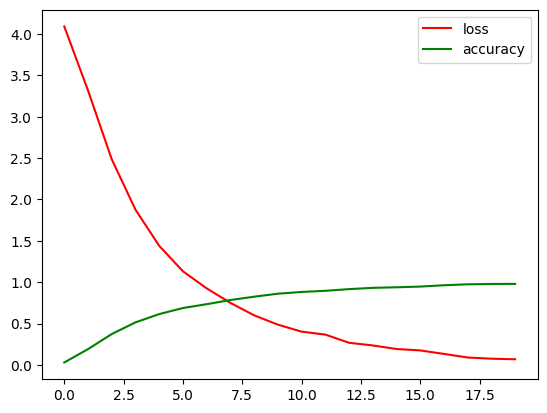

In [28]:
# model.evaluate(X_train, Y_train)

plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.legend(loc = 'upper right')
# plt.grid(True)

# Making predictions

Image no. =  639
1/1 [==============================] - 0s 38ms/step
Our model says it is : 11
It is found to be :  B


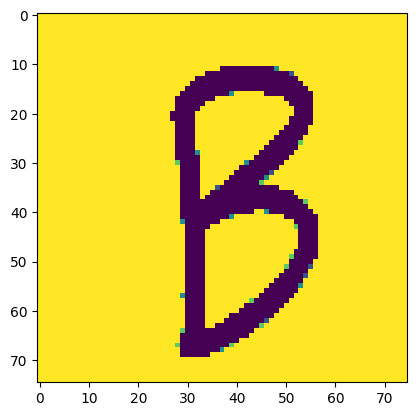

In [29]:
# idx2 = random.randint(0, len(data))
# plt.imshow(data[idx2, 0, :])
# plt.show()
idx = random.randint(0, len(data))
print("Image no. = ",idx)
plt.imshow(data[idx][0]) #cmap = 'gray')
# print("Image label accd to dict: ", y[idx])

y_pred = model.predict(data[idx][0].reshape(1, img_size, img_size, 1))
prediction = np.argmax(y_pred)

print("Our model says it is :", prediction)

print("It is found to be : ", list(class_dict.keys())
      [list(class_dict.values()).index(prediction)])
    
# print(y_pred)

1/1 [==============================] - 0s 33ms/step
Our model says it is a : 55
It is estimated to be :  t
Screenshot 2022-10-28 at 2.10.24 AM.png


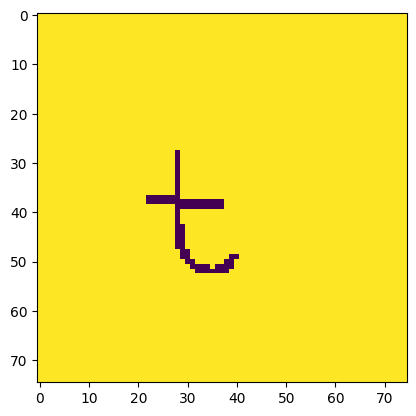

In [23]:
testing_data = os.listdir('test_folder')
r = random.randint(0, len(testing_data)-1)
image = testing_data[r]
path = f"/Users/vanviet/Documents/HandwrittenTextRecognition/test_folder/{image}"
# path = r"/Users/ratanprakash/Documents/tf_project/test_folder/rr.png"

test_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (img_size, img_size))
# test_image = np.invert(test_image)
test_image = test_image/255.0
contrast_test_image = np.round_(test_image)
test_image = contrast_test_image
plt.imshow(test_image) #cmap='gray')

test_image = test_image.reshape(1, img_size, img_size, 1)
y_pred = model.predict(test_image)
prediction = np.argmax(y_pred)

print("Our model says it is a :", prediction)
print("It is estimated to be : ", list(class_dict.keys())
      [list(class_dict.values()).index(prediction)])
print(image)